# We're been playing so far. Start here

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np


In [2]:
import math
def calculateRatioErrorBar (num, den):
    if den:
        if num/(den*den)*(1-num/den) > 0:
            return math.sqrt(num/(den*den)*(1-num/den)   )
    return 0
    
def calculateErrorBar (num, den):
    errors = []
    for i,s in enumerate(num):
        errors.append(calculateRatioErrorBar (num[i], den[i]))
    return errors

In [44]:
def ratioPlotsWeight(n1,n1Sel,n3,n3Sel,un1,un1Sel,un3,un3Sel,bins1,interaction,title):
    ratioRun1    = np.divide(n1Sel, n1, out=np.zeros_like(n1Sel), where=n1!=0)
    ratioRun3    = np.divide(n3Sel, n3, out=np.zeros_like(n3Sel), where=n1!=0)

    bincenters = 0.5*(bins1[1:]+bins1[:-1])
    width      = (bins1[1:]-bins1[:-1])
    
    errrRun1    = calculateErrorBar(un1Sel, un1)
    errrRun3    = calculateErrorBar(un3Sel, un3)

    
    fig, ax = plt.subplots()
    ax.plot(bincenters, ratioRun1, marker="o",markersize=4., linestyle="",  color="r",label="FHC MC")
    ax.plot(bincenters, ratioRun3, marker="o",markersize=4., linestyle="",  color="b",label="RHC MC")
    ax.bar (bincenters, ratioRun1, width=width,  yerr=errrRun1, alpha=0.75,fill=False,ecolor='r',edgecolor='w')
    ax.bar (bincenters, ratioRun3, width=width,  yerr=errrRun3, alpha=0.75,fill=False,ecolor='b',edgecolor='w')

    ax.set_xlabel('True Nu Energy [GeV]')
    ax.set_ylabel(interaction+" Eff")
    ax.set_title(title)
    ax.legend()
    fig.tight_layout()
    fig.savefig("../plots/run1run3/ratios/"+interaction+"_"+title+"_eff.pdf")
    plt.show()
    
def ratioPlots(n1,n1Sel,n3,n3Sel,bins1,interaction,title):
    ratioRun1    = np.divide(n1Sel, n1, out=np.zeros_like(n1Sel), where=n1!=0)
    ratioRun3    = np.divide(n3Sel, n3, out=np.zeros_like(n3Sel), where=n1!=0)

    bincenters = 0.5*(bins1[1:]+bins1[:-1])
    width      = (bins1[1:]-bins1[:-1])
    
    errrRun1    = calculateErrorBar(n1Sel, n1)
    errrRun3    = calculateErrorBar(n3Sel, n3)

    
    fig, ax = plt.subplots()
    ax.plot(bincenters, ratioRun1, marker="o",markersize=4., linestyle="",  color="r",label="FHC MC")
    ax.plot(bincenters, ratioRun3, marker="o",markersize=4., linestyle="",  color="b",label="RHC MC")
    ax.bar (bincenters, ratioRun1, width=width,  yerr=errrRun1, alpha=0.75,fill=False,ecolor='r',edgecolor='w')
    ax.bar (bincenters, ratioRun3, width=width,  yerr=errrRun3, alpha=0.75,fill=False,ecolor='b',edgecolor='w')

    ax.set_xlabel('True Nu Energy [GeV]')
    ax.set_ylabel(interaction)
    ax.set_title(title)
    ax.legend()
    fig.tight_layout()
    fig.savefig("../plots/run1run3/"+interaction+"_"+title+"_eff.pdf")
    plt.show()
    
    
def histoPlot(s1,s3,w1,w3,interaction,tag,title,useW):
    fig, ax = plt.subplots()
    if useW:
        n1_0, bins, patches = ax.hist(s1, 25,range=(0,6),weights=w1, alpha=0.75, label="FHC MC")
        n3_0, bins, patches = ax.hist(s3, 25,range=(0,6),weights=w3, alpha=0.75, label="RHC MC")
    else:
        n1_0, bins, patches = ax.hist(s1, 25,range=(0,6), alpha=0.75, label="FHC MC")
        n3_0, bins, patches = ax.hist(s3, 25,range=(0,6), alpha=0.75, label="RHC MC")
        
    ax.set_xlabel('True Nu Energy [GeV]')
    ax.set_ylabel('Counts')
    ax.set_title('Run1-Run3 '+interaction+' '+tag+'')
    ax.legend()
    fig.tight_layout()
    fig.savefig("../plots/run1run3/"+interaction+"_"+tag+".pdf")
    return n1_0, n3_0, bins

In [23]:
def allRatio(run1CSV,run1SelCSV,run3CSV,run3SelCSV,nuType = "nue",title="1eNp"):
    # I am interested in understanding if I predict a different event rate for FHC and RHC 
    # I I roughly have the same POT (which I do in the MC)
    r1     = pd.read_csv(run1CSV)
    r11eNp = pd.read_csv(run1SelCSV)
    r3     = pd.read_csv(run3CSV)
    r31eNp = pd.read_csv(run3SelCSV)

    print("All")

    n1   , n3   , bins = histoPlot(r1["nu_e"]    ,r3["nu_e"]    ,r1["weightSplineTimesTuneTimesPPFX"]    ,r3["weightSplineTimesTuneTimesPPFX"]    ,"All",nuType,title,True)
    n1Sel, n3Sel, bins = histoPlot(r11eNp["nu_e"],r31eNp["nu_e"],r11eNp["weightSplineTimesTuneTimesPPFX"],r31eNp["weightSplineTimesTuneTimesPPFX"],"All",nuType,title,True)
    un1   , un3   , bins = histoPlot(r1["nu_e"]    ,r3["nu_e"]    ,r1["weightSplineTimesTuneTimesPPFX"]    ,r3["weightSplineTimesTuneTimesPPFX"]    ,"All",nuType,title,False)
    un1Sel, un3Sel, bins = histoPlot(r11eNp["nu_e"],r31eNp["nu_e"],r11eNp["weightSplineTimesTuneTimesPPFX"],r31eNp["weightSplineTimesTuneTimesPPFX"],"All",nuType,title,False)

    ratioPlotsWeight(n1,n1Sel,n3,n3Sel,un1,un1Sel,un3,un3Sel,bins,"All",nuType+title)

    r1_int0  = r1.query("interaction == 0")
    r1_int1  = r1.query("interaction == 1")
    r1_int2  = r1.query("interaction == 2")
    r1_int3  = r1.query("interaction == 3")
    r1_int10 = r1.query("interaction == 10")

    r3_int0  = r3.query("interaction == 0")
    r3_int1  = r3.query("interaction == 1")
    r3_int2  = r3.query("interaction == 2")
    r3_int3  = r3.query("interaction == 3")
    r3_int10 = r3.query("interaction == 10")

    r1_Sel_int0  = r11eNp.query("interaction == 0")
    r1_Sel_int1  = r11eNp.query("interaction == 1")
    r1_Sel_int2  = r11eNp.query("interaction == 2")
    r1_Sel_int3  = r11eNp.query("interaction == 3")
    r1_Sel_int10 = r11eNp.query("interaction == 10")

    r3_Sel_int0  = r31eNp.query("interaction == 0")
    r3_Sel_int1  = r31eNp.query("interaction == 1")
    r3_Sel_int2  = r31eNp.query("interaction == 2")
    r3_Sel_int3  = r31eNp.query("interaction == 3")
    r3_Sel_int10 = r31eNp.query("interaction == 10")

    print("QE")
    n1_0   , n3_0   , bins = histoPlot(r1_int0["nu_e"]    ,r3_int0["nu_e"]    ,r1_int0["weightSplineTimesTuneTimesPPFX"]    ,r3_int0["weightSplineTimesTuneTimesPPFX"]    ,"QE","PreSel",title,True)
    n1Sel_0, n3Sel_0, bins = histoPlot(r1_Sel_int0["nu_e"],r3_Sel_int0["nu_e"],r1_Sel_int0["weightSplineTimesTuneTimesPPFX"],r3_Sel_int0["weightSplineTimesTuneTimesPPFX"],"QE","PostSel",title,True)
    un1_0   , un3_0   , bins = histoPlot(r1_int0["nu_e"]    ,r3_int0["nu_e"]    ,r1_int0["weightSplineTimesTuneTimesPPFX"]    ,r3_int0["weightSplineTimesTuneTimesPPFX"]    ,"QE","PreSel",title,False)
    un1Sel_0, un3Sel_0, bins = histoPlot(r1_Sel_int0["nu_e"],r3_Sel_int0["nu_e"],r1_Sel_int0["weightSplineTimesTuneTimesPPFX"],r3_Sel_int0["weightSplineTimesTuneTimesPPFX"],"QE","PostSel",title,False)
    ratioPlotsWeight(n1_0,n1Sel_0,n3_0,n3Sel_0,un1_0,un1Sel_0,un3_0,un3Sel_0,bins,"QE",nuType+title)
    
    print("RES")
    n1_1   , n3_1   , bins = histoPlot(r1_int1["nu_e"]    ,r3_int1["nu_e"]    ,r1_int1["weightSplineTimesTuneTimesPPFX"]    ,r3_int1["weightSplineTimesTuneTimesPPFX"]    ,"RES","PreSel",title,True)
    n1Sel_1, n3Sel_1, bins = histoPlot(r1_Sel_int1["nu_e"],r3_Sel_int1["nu_e"],r1_Sel_int1["weightSplineTimesTuneTimesPPFX"],r3_Sel_int1["weightSplineTimesTuneTimesPPFX"],"RES","PostSel",title,True)
    un1_1   , un3_1   , bins = histoPlot(r1_int1["nu_e"]    ,r3_int1["nu_e"]    ,r1_int1["weightSplineTimesTuneTimesPPFX"]    ,r3_int1["weightSplineTimesTuneTimesPPFX"]    ,"RES","PreSel",title,False)
    un1Sel_1, un3Sel_1, bins = histoPlot(r1_Sel_int1["nu_e"],r3_Sel_int1["nu_e"],r1_Sel_int1["weightSplineTimesTuneTimesPPFX"],r3_Sel_int1["weightSplineTimesTuneTimesPPFX"],"RES","PostSel",title,False)
    ratioPlotsWeight(n1_1,n1Sel_1,n3_1,n3Sel_1,un1_1,un1Sel_1,un3_1,un3Sel_1,bins,"RES",nuType+title)

    print("DIS")
    n1_2   , n3_2   , bins = histoPlot(r1_int2["nu_e"]    ,r3_int2["nu_e"]    ,r1_int2["weightSplineTimesTuneTimesPPFX"]    ,r3_int2["weightSplineTimesTuneTimesPPFX"]    ,"DIS","PreSel",title,True)
    n1Sel_2, n3Sel_2, bins = histoPlot(r1_Sel_int2["nu_e"],r3_Sel_int2["nu_e"],r1_Sel_int2["weightSplineTimesTuneTimesPPFX"],r3_Sel_int2["weightSplineTimesTuneTimesPPFX"],"DIS","PostSel",title,True)
    un1_2   , un3_2   , bins = histoPlot(r1_int2["nu_e"]    ,r3_int2["nu_e"]    ,r1_int2["weightSplineTimesTuneTimesPPFX"]    ,r3_int2["weightSplineTimesTuneTimesPPFX"]    ,"DIS","PreSel",title,False)
    un1Sel_2, un3Sel_2, bins = histoPlot(r1_Sel_int2["nu_e"],r3_Sel_int2["nu_e"],r1_Sel_int2["weightSplineTimesTuneTimesPPFX"],r3_Sel_int2["weightSplineTimesTuneTimesPPFX"],"DIS","PostSel",title,False)
    ratioPlotsWeight(n1_2,n1Sel_2,n3_2,n3Sel_2,un1_2,un1Sel_2,un3_2,un3Sel_2,bins,"DIS",nuType+title)

    print("Coh")
    n1_3   , n3_3   , bins = histoPlot(r1_int3["nu_e"]    ,r3_int3["nu_e"]    ,r1_int3["weightSplineTimesTuneTimesPPFX"]    ,r3_int3["weightSplineTimesTuneTimesPPFX"]    ,"Coh","PreSel",title,True)
    n1Sel_3, n3Sel_3, bins = histoPlot(r1_Sel_int3["nu_e"],r3_Sel_int3["nu_e"],r1_Sel_int3["weightSplineTimesTuneTimesPPFX"],r3_Sel_int3["weightSplineTimesTuneTimesPPFX"],"Coh","PostSel",title,True)
    un1_3   , un3_3   , bins = histoPlot(r1_int3["nu_e"]    ,r3_int3["nu_e"]    ,r1_int3["weightSplineTimesTuneTimesPPFX"]    ,r3_int3["weightSplineTimesTuneTimesPPFX"]    ,"Coh","PreSel",title,False)
    un1Sel_3, un3Sel_3, bins = histoPlot(r1_Sel_int3["nu_e"],r3_Sel_int3["nu_e"],r1_Sel_int3["weightSplineTimesTuneTimesPPFX"],r3_Sel_int3["weightSplineTimesTuneTimesPPFX"],"Coh","PostSel",title,False)
    ratioPlotsWeight(n1_3,n1Sel_3,n3_3,n3Sel_3,un1_3,un1Sel_3,un3_3,un3Sel_3,bins,"Coh",nuType+title)

    print("MEC")
    n1_10   , n3_10   , bins = histoPlot(r1_int10["nu_e"]    ,r3_int10["nu_e"]    ,r1_int10["weightSplineTimesTuneTimesPPFX"]    ,r3_int10["weightSplineTimesTuneTimesPPFX"]    ,"MEC","PreSel",title,True)
    n1Sel_10, n3Sel_10, bins = histoPlot(r1_Sel_int10["nu_e"],r3_Sel_int10["nu_e"],r1_Sel_int10["weightSplineTimesTuneTimesPPFX"],r3_Sel_int10["weightSplineTimesTuneTimesPPFX"],"MEC","PostSel",title,True)
    un1_10   , un3_10   , bins = histoPlot(r1_int10["nu_e"]    ,r3_int10["nu_e"]    ,r1_int10["weightSplineTimesTuneTimesPPFX"]    ,r3_int10["weightSplineTimesTuneTimesPPFX"]    ,"MEC","PreSel",title,False)
    un1Sel_10, un3Sel_10, bins = histoPlot(r1_Sel_int10["nu_e"],r3_Sel_int10["nu_e"],r1_Sel_int10["weightSplineTimesTuneTimesPPFX"],r3_Sel_int10["weightSplineTimesTuneTimesPPFX"],"MEC","PostSel",title,False)
    ratioPlotsWeight(n1_10,n1Sel_10,n3_10,n3Sel_10,un1_10,un1Sel_10,un3_10,un3Sel_10,bins,"MEC",nuType+title)
    



In [24]:
def composition(run1CSV,run3CSV,title="Nue"):
    r1     = pd.read_csv(run1CSV)
    r3     = pd.read_csv(run3CSV)

    r1_int0  = r1.query("interaction == 0")
    r1_int1  = r1.query("interaction == 1")
    r1_int2  = r1.query("interaction == 2")
    r1_int3  = r1.query("interaction == 3")
    r1_int10 = r1.query("interaction == 10")

    r3_int0  = r3.query("interaction == 0")
    r3_int1  = r3.query("interaction == 1")
    r3_int2  = r3.query("interaction == 2")
    r3_int3  = r3.query("interaction == 3")
    r3_int10 = r3.query("interaction == 10")
 
    
    
    n1   , QE1 , bins = histoPlot(r1["nu_e"]    ,r1_int0["nu_e"]    ,r1["weightSplineTimesTuneTimesPPFX"]    ,r1_int0["weightSplineTimesTuneTimesPPFX"]    ,"QE","QE_Ratio",title,True)
    n3   , QE3 , bins = histoPlot(r3["nu_e"]    ,r3_int0["nu_e"]    ,r3["weightSplineTimesTuneTimesPPFX"]    ,r3_int0["weightSplineTimesTuneTimesPPFX"]    ,"QE","QE_Ratio",title,True)
    un1  , uQE1, bins = histoPlot(r1["nu_e"]    ,r1_int0["nu_e"]    ,r1["weightSplineTimesTuneTimesPPFX"]    ,r1_int0["weightSplineTimesTuneTimesPPFX"]    ,"QE","QE_Ratio",title,False)
    un3  , uQE3, bins = histoPlot(r3["nu_e"]    ,r3_int0["nu_e"]    ,r3["weightSplineTimesTuneTimesPPFX"]    ,r3_int0["weightSplineTimesTuneTimesPPFX"]    ,"QE","QE_Ratio",title,False)
    ratioPlotsWeight(n1,QE1,n3,QE3,un1,uQE1,un3,uQE3,bins,"QE",title)

    n1   , RES1 , bins = histoPlot(r1["nu_e"]  ,r1_int1["nu_e"]  ,r1["weightSplineTimesTuneTimesPPFX"]    ,r1_int1["weightSplineTimesTuneTimesPPFX"]    ,"RES","RES_Ratio",title,True)
    n3   , RES3 , bins = histoPlot(r3["nu_e"]  ,r3_int1["nu_e"]  ,r3["weightSplineTimesTuneTimesPPFX"]    ,r3_int1["weightSplineTimesTuneTimesPPFX"]    ,"RES","RES_Ratio",title,True)
    un1  , uRES1, bins = histoPlot(r1["nu_e"]  ,r1_int1["nu_e"]  ,r1["weightSplineTimesTuneTimesPPFX"]    ,r1_int1["weightSplineTimesTuneTimesPPFX"]    ,"RES","RES_Ratio",title,False)
    un3  , uRES3, bins = histoPlot(r3["nu_e"]  ,r3_int1["nu_e"]  ,r3["weightSplineTimesTuneTimesPPFX"]    ,r3_int1["weightSplineTimesTuneTimesPPFX"]    ,"RES","RES_Ratio",title,False)
    ratioPlotsWeight(n1,RES1,n3,RES3,un1,uRES1,un3,uRES3,bins,"RES",title)


    n1   , DIS1 , bins = histoPlot(r1["nu_e"]   ,r1_int2["nu_e"]  ,r1["weightSplineTimesTuneTimesPPFX"]    ,r1_int2["weightSplineTimesTuneTimesPPFX"]    ,"DIS","DIS_Ratio",title,True)
    n3   , DIS3 , bins = histoPlot(r3["nu_e"]   ,r3_int2["nu_e"]  ,r3["weightSplineTimesTuneTimesPPFX"]    ,r3_int2["weightSplineTimesTuneTimesPPFX"]    ,"DIS","DIS_Ratio",title,True)
    un1  , uDIS1, bins = histoPlot(r1["nu_e"]   ,r1_int2["nu_e"]  ,r1["weightSplineTimesTuneTimesPPFX"]    ,r1_int2["weightSplineTimesTuneTimesPPFX"]    ,"DIS","DIS_Ratio",title,False)
    un3  , uDIS3, bins = histoPlot(r3["nu_e"]   ,r3_int2["nu_e"]  ,r3["weightSplineTimesTuneTimesPPFX"]    ,r3_int2["weightSplineTimesTuneTimesPPFX"]    ,"DIS","DIS_Ratio",title,False)
    ratioPlotsWeight(n1,DIS1,n3,DIS3,un1,uDIS1,un3,uDIS3,bins,"DIS",title)
    
    
    n1   , MEC1 , bins = histoPlot(r1["nu_e"]    ,r1_int10["nu_e"]    ,r1["weightSplineTimesTuneTimesPPFX"]    ,r1_int10["weightSplineTimesTuneTimesPPFX"]    ,"MEC","MEC_Ratio",title,True)
    n3   , MEC3 , bins = histoPlot(r3["nu_e"]    ,r3_int10["nu_e"]    ,r3["weightSplineTimesTuneTimesPPFX"]    ,r3_int10["weightSplineTimesTuneTimesPPFX"]    ,"MEC","MEC_Ratio",title,True)
    un1  , uMEC1, bins = histoPlot(r1["nu_e"]    ,r1_int10["nu_e"]    ,r1["weightSplineTimesTuneTimesPPFX"]    ,r1_int10["weightSplineTimesTuneTimesPPFX"]    ,"MEC","MEC_Ratio",title,False)
    un3  , uMEC3, bins = histoPlot(r3["nu_e"]    ,r3_int10["nu_e"]    ,r3["weightSplineTimesTuneTimesPPFX"]    ,r3_int10["weightSplineTimesTuneTimesPPFX"]    ,"MEC","MEC_Ratio",title,False)
    ratioPlotsWeight(n1,MEC1,n3,MEC3,un1,uMEC1,un3,uMEC3,bins,"MEC",title)


All


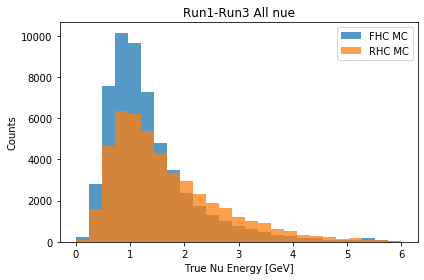

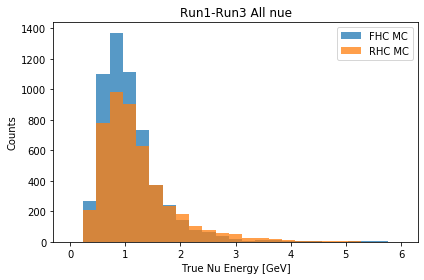

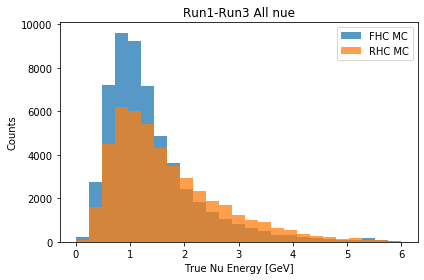

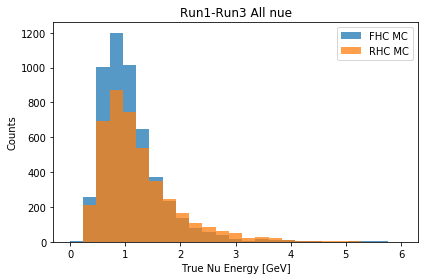

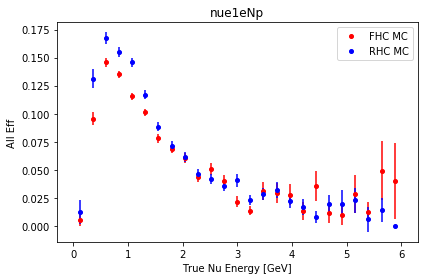

QE


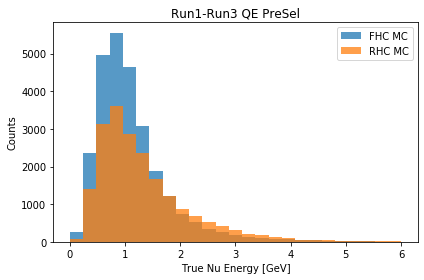

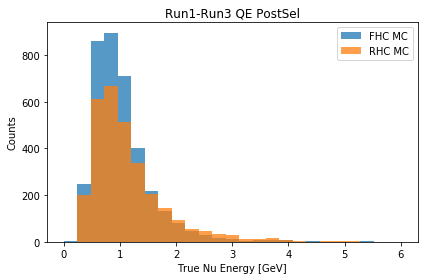

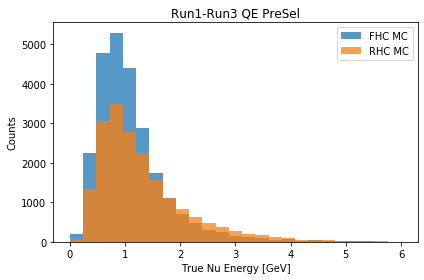

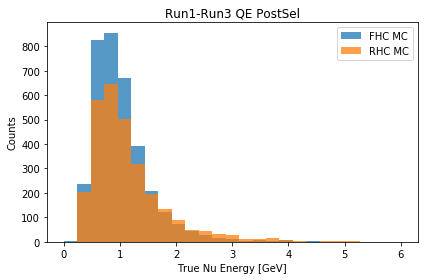

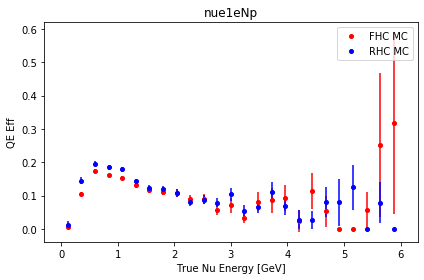

RES


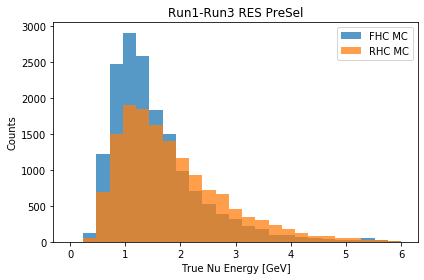

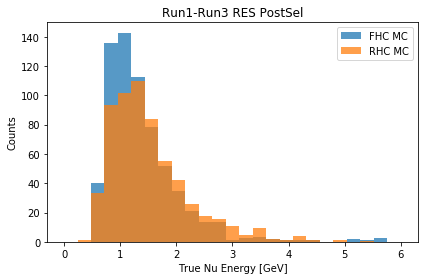

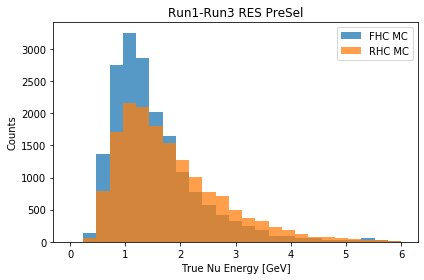

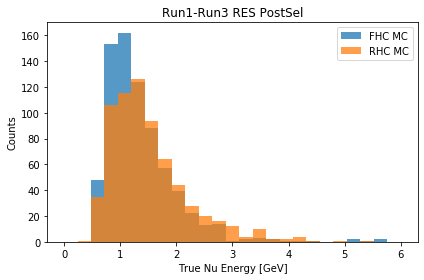

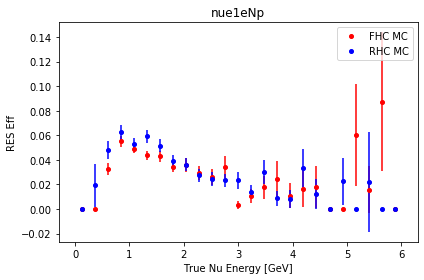

DIS


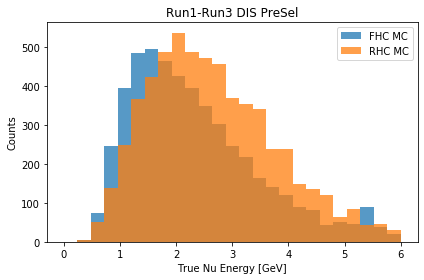

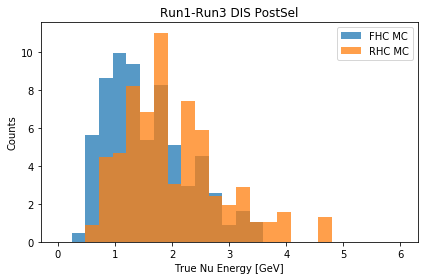

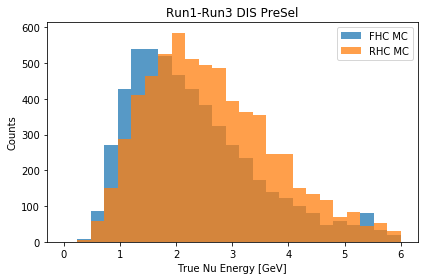

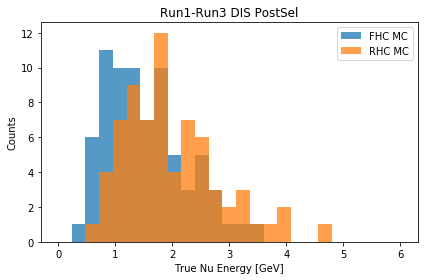

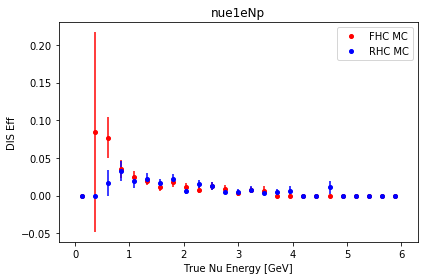

Coh


/Users/elenag/miniconda3/envs/peleeNB/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


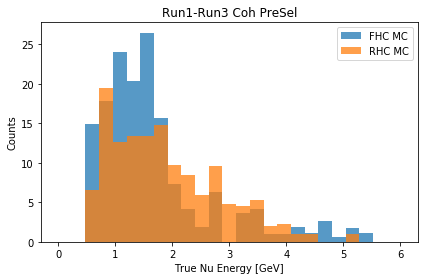

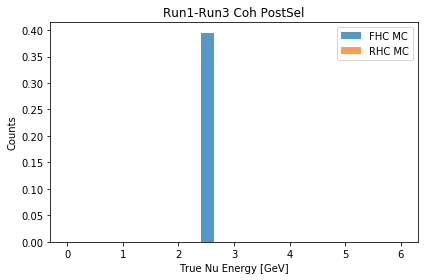

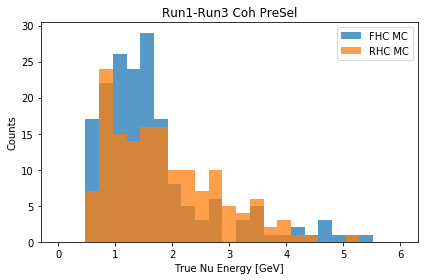

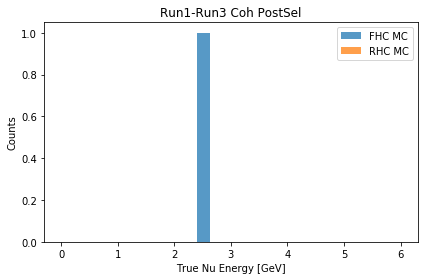

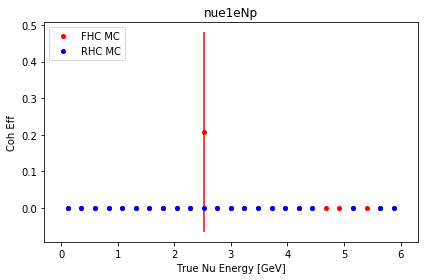

MEC


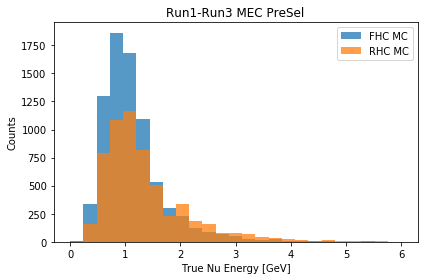

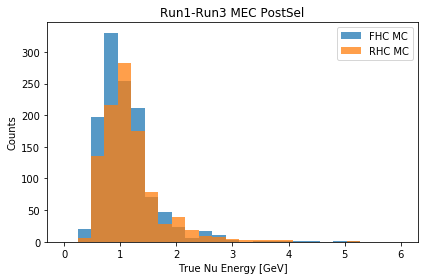

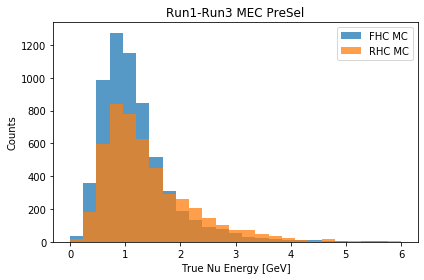

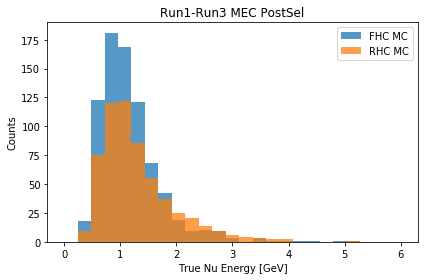

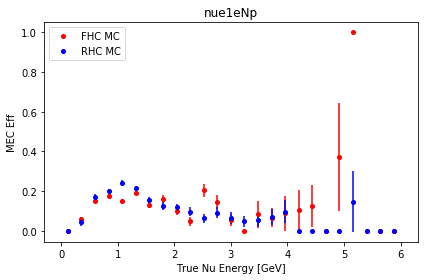

All


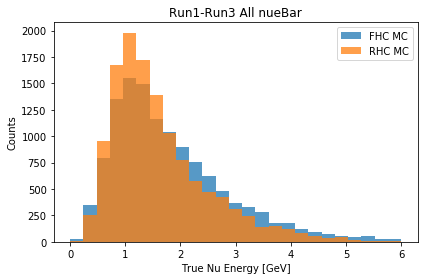

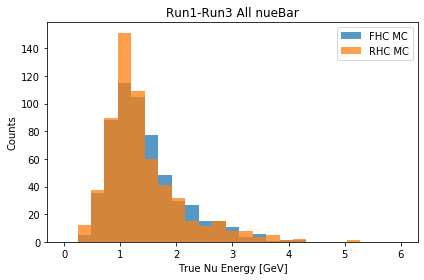

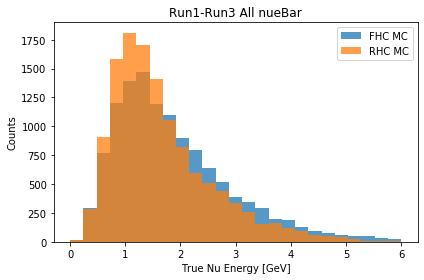

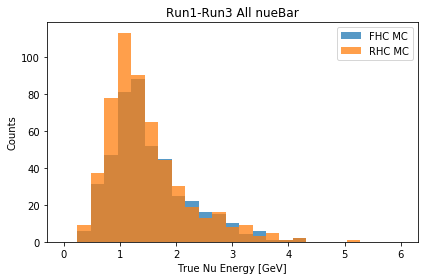

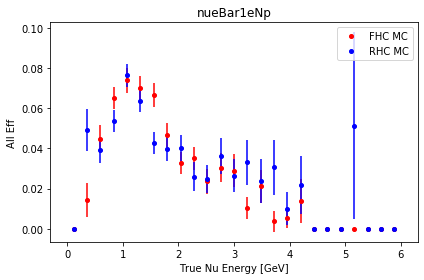

QE


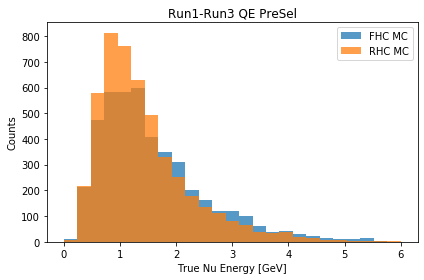

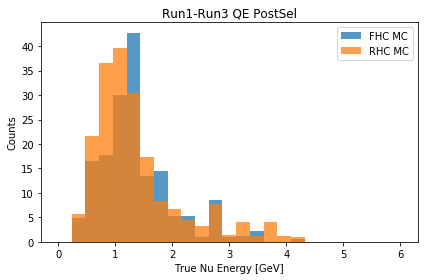

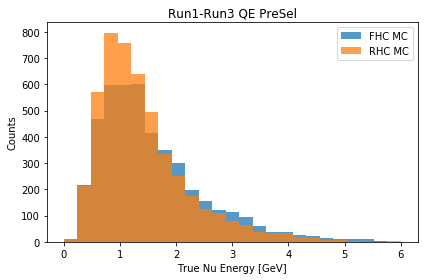

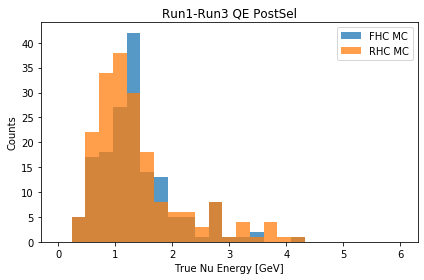

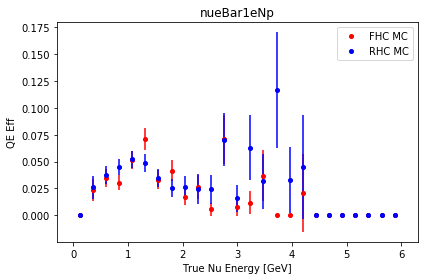

RES


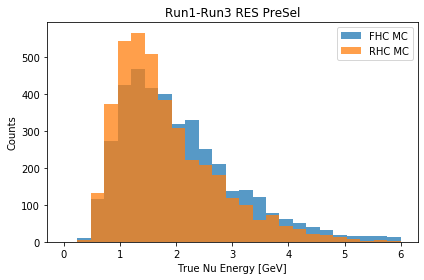

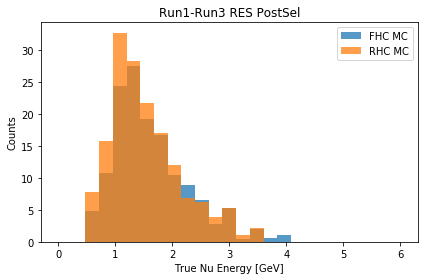

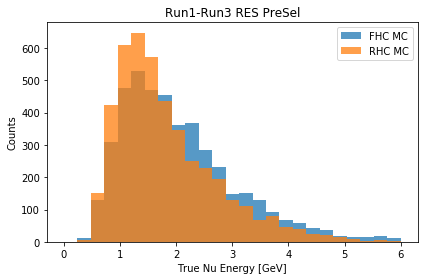

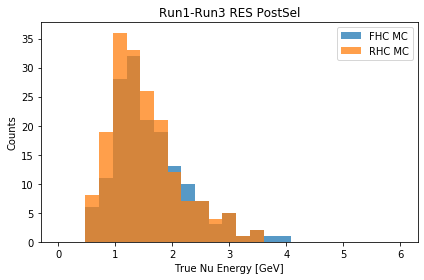

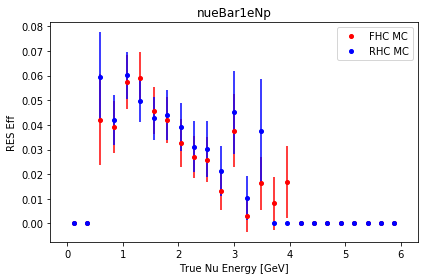

DIS


/Users/elenag/miniconda3/envs/peleeNB/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


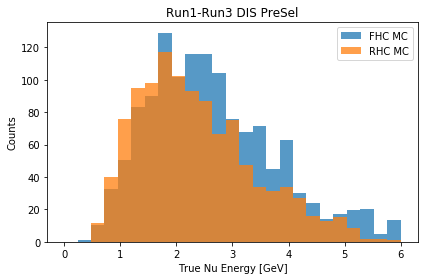

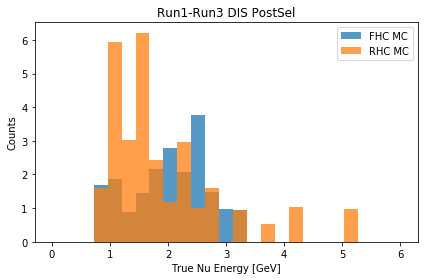

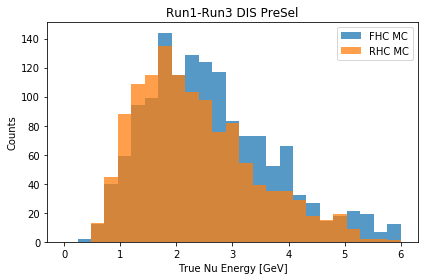

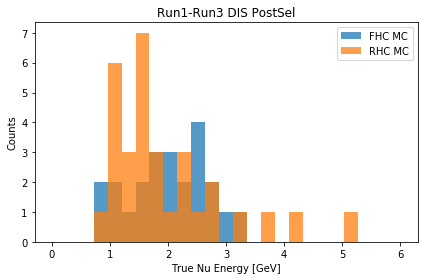

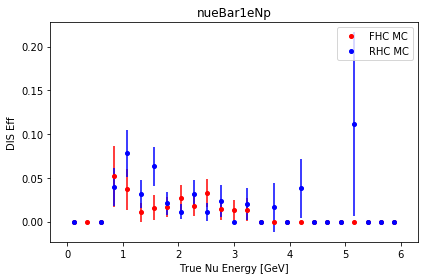

Coh


/Users/elenag/miniconda3/envs/peleeNB/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


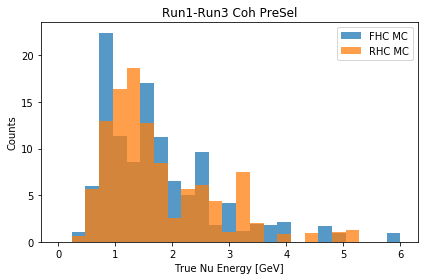

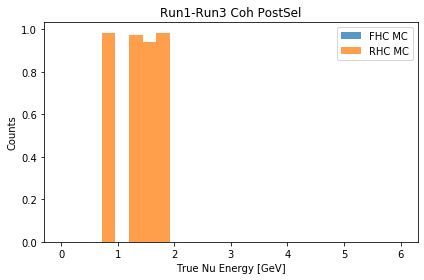

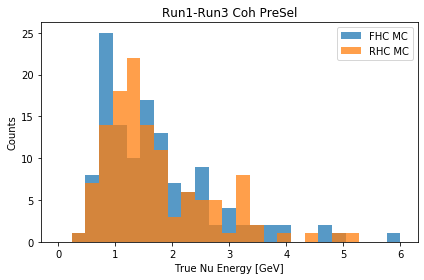

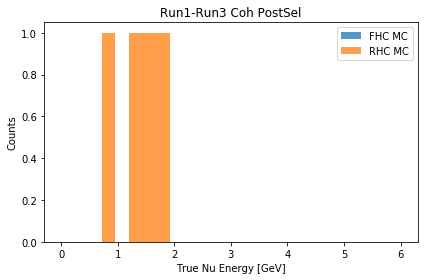

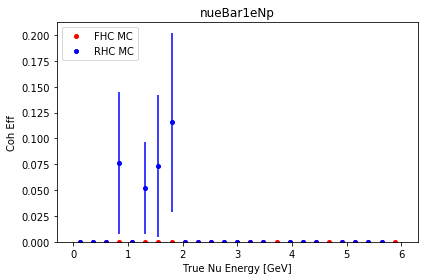

MEC


/Users/elenag/miniconda3/envs/peleeNB/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


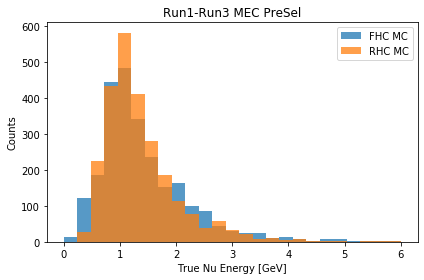

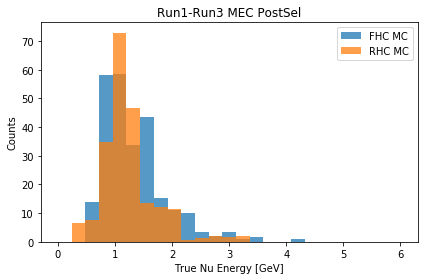

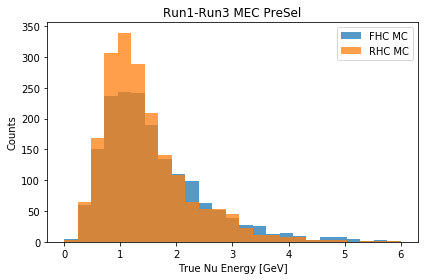

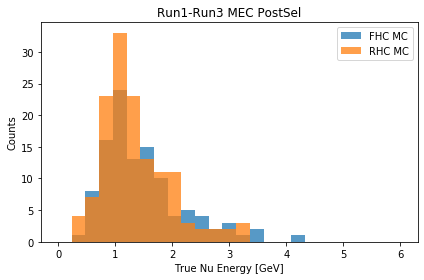

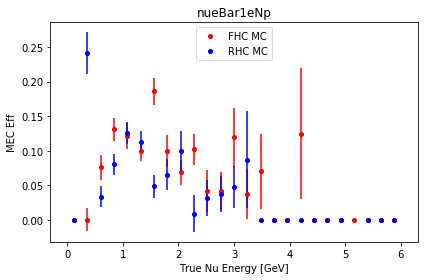

All


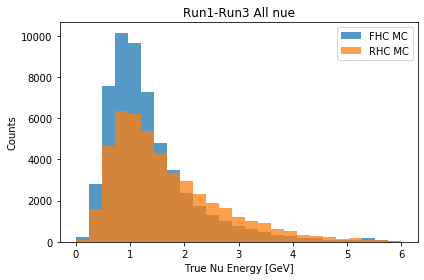

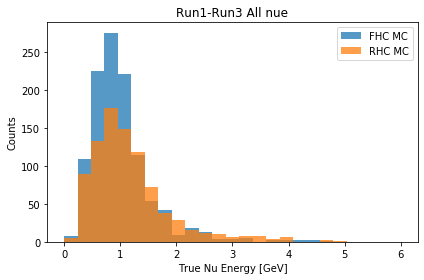

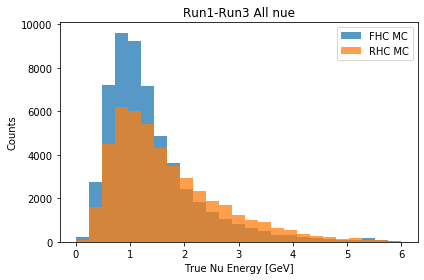

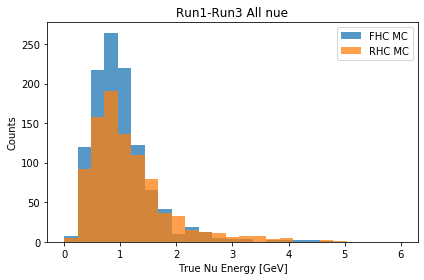

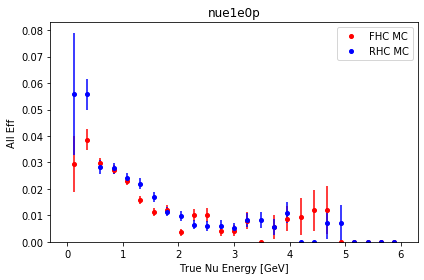

QE


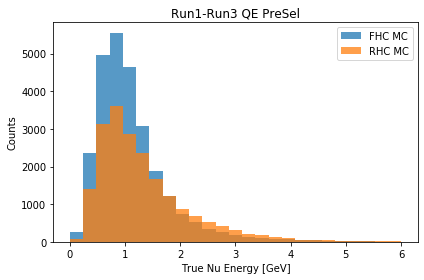

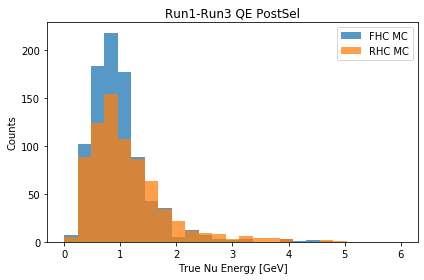

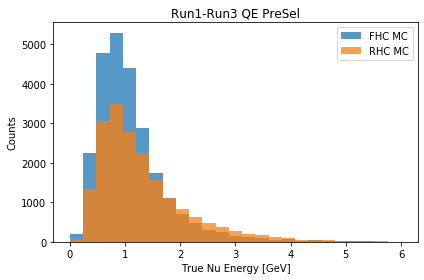

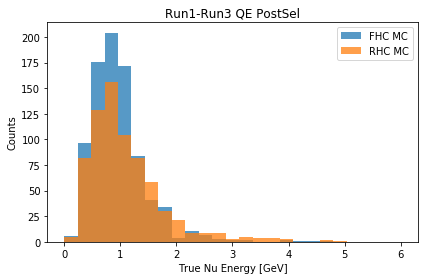

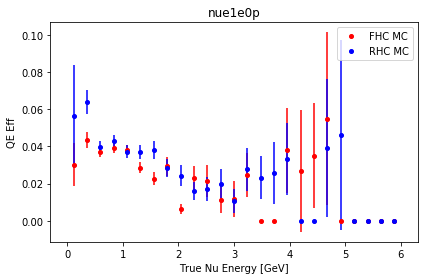

RES


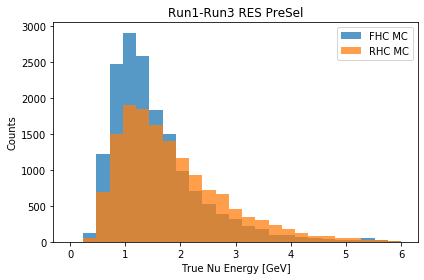

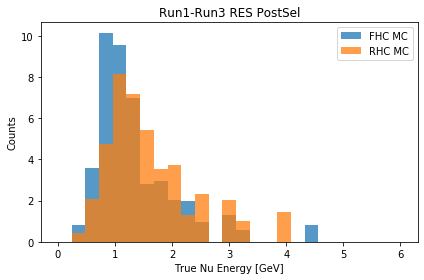

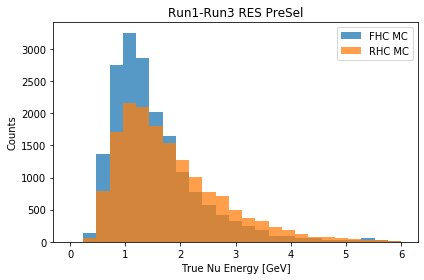

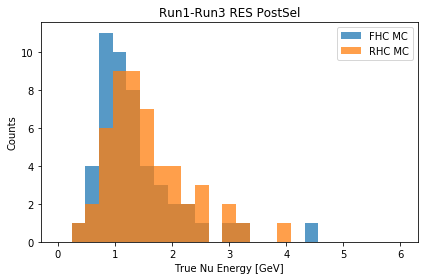

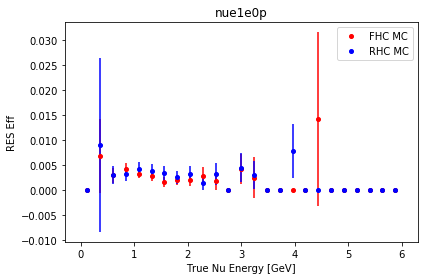

DIS


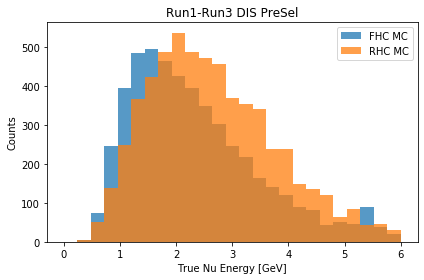

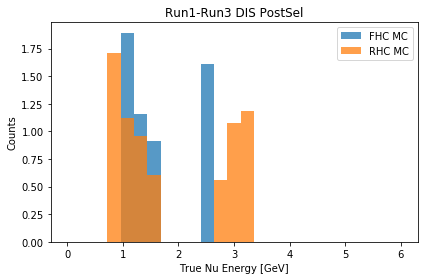

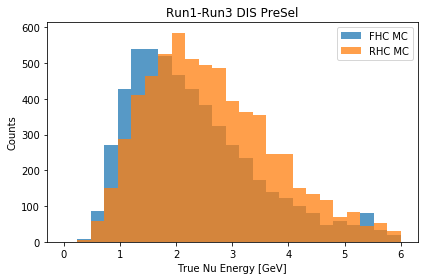

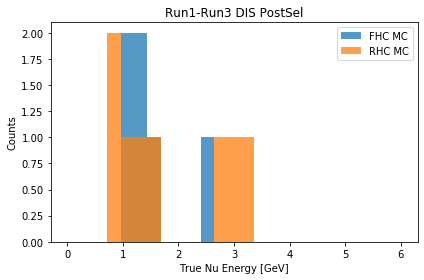

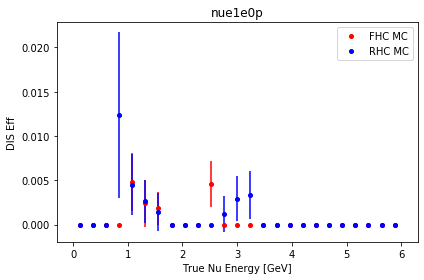

Coh


/Users/elenag/miniconda3/envs/peleeNB/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


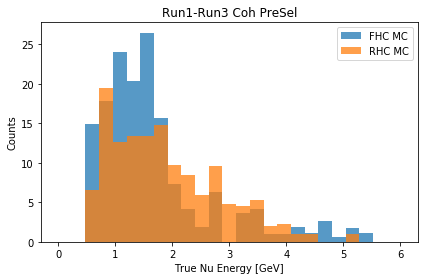

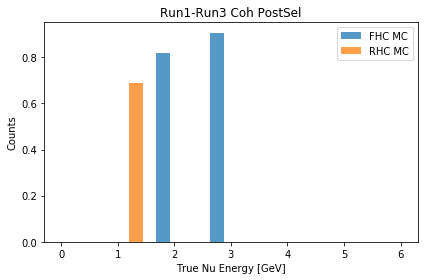

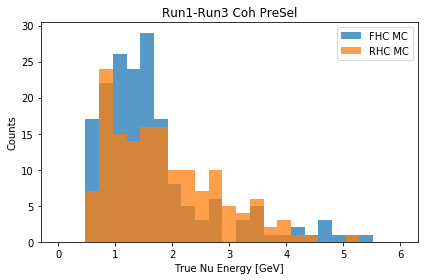

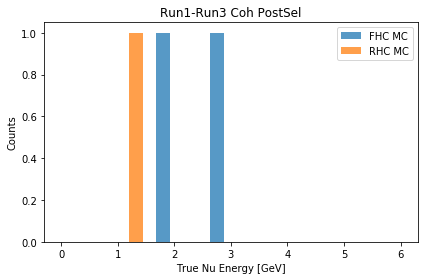

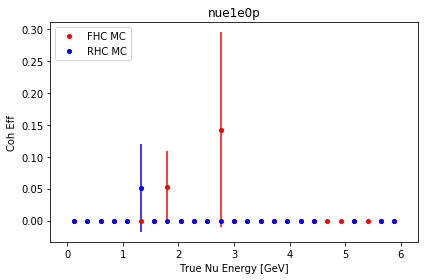

MEC


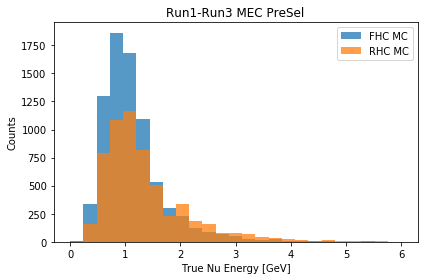

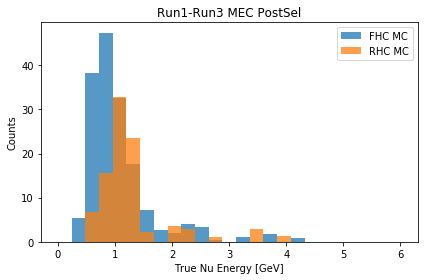

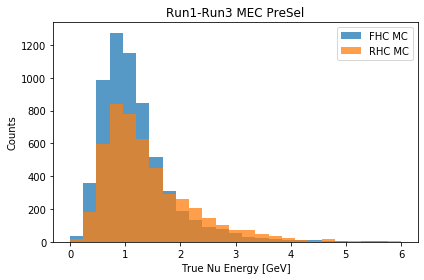

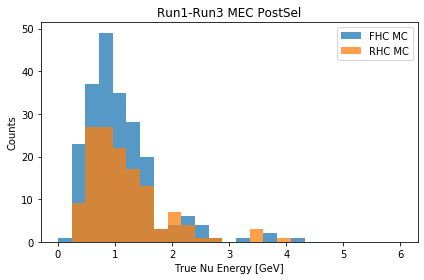

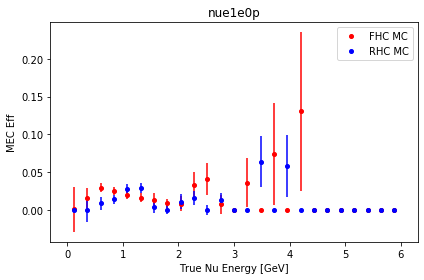

All


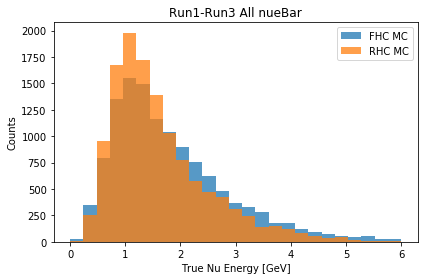

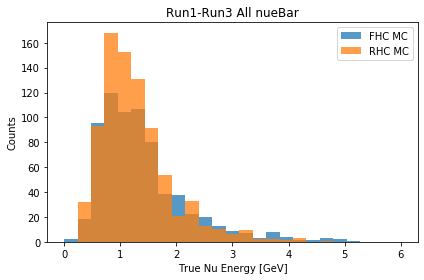

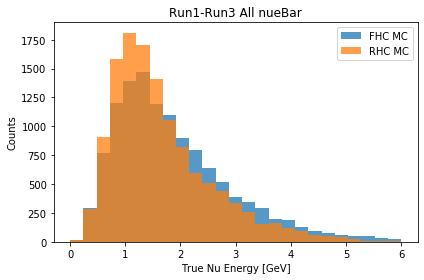

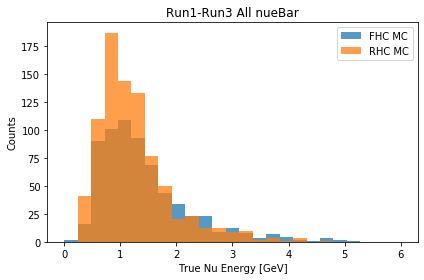

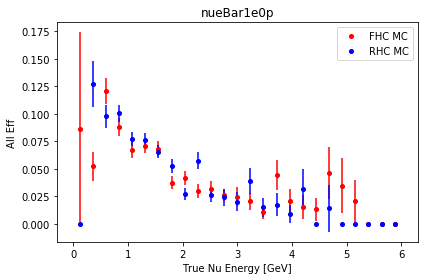

QE


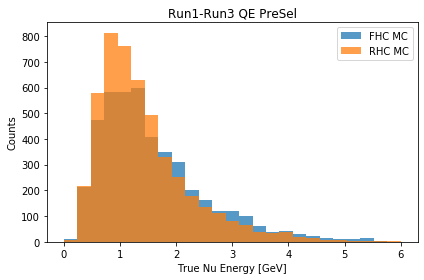

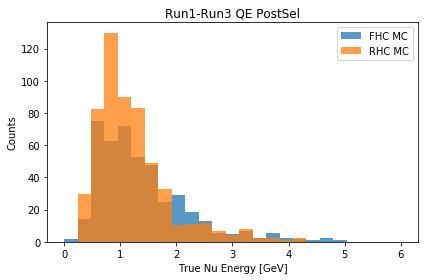

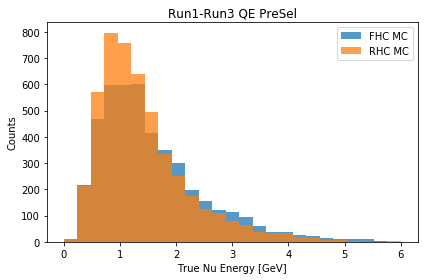

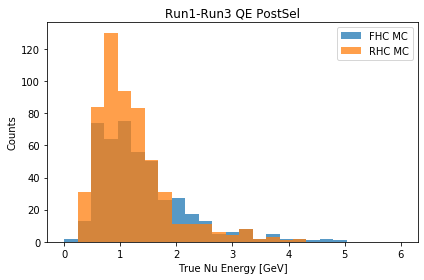

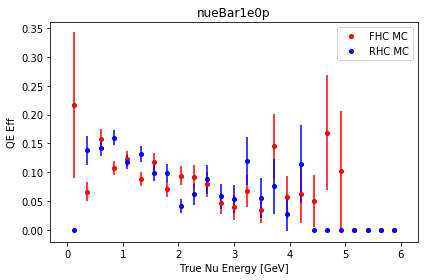

RES


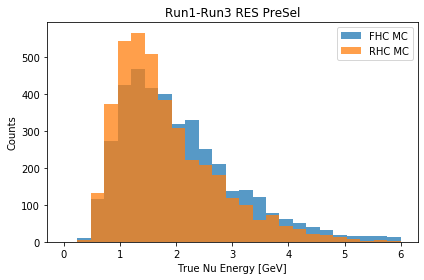

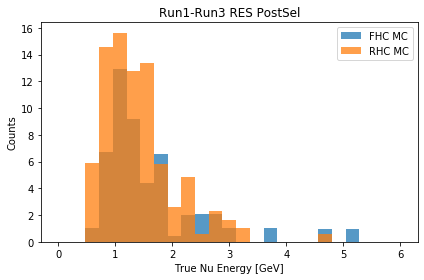

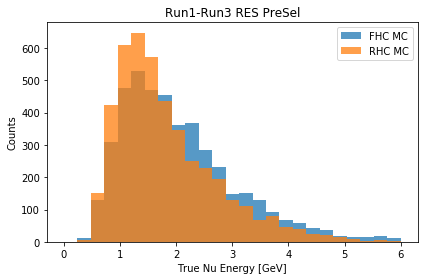

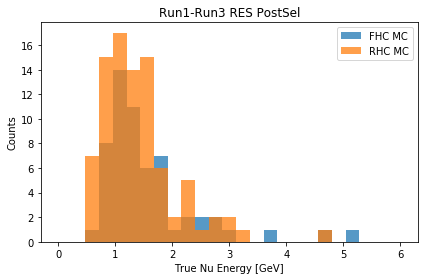

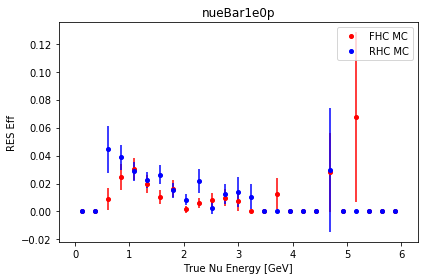

DIS


/Users/elenag/miniconda3/envs/peleeNB/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


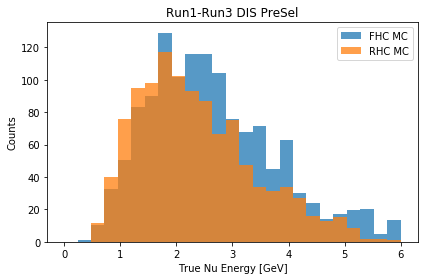

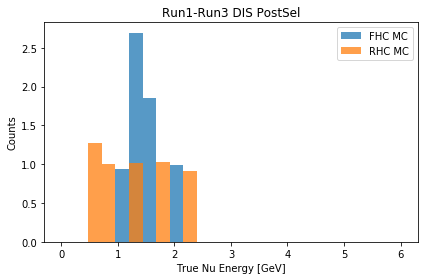

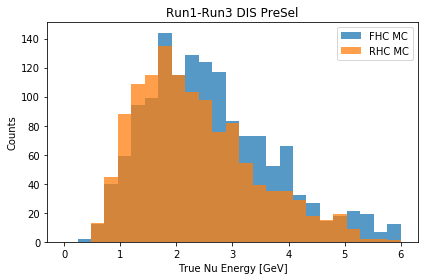

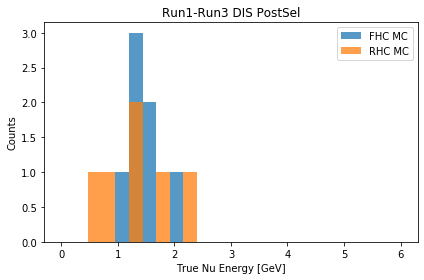

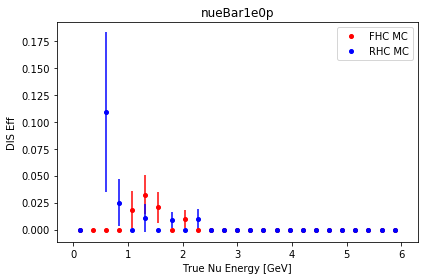

Coh


/Users/elenag/miniconda3/envs/peleeNB/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


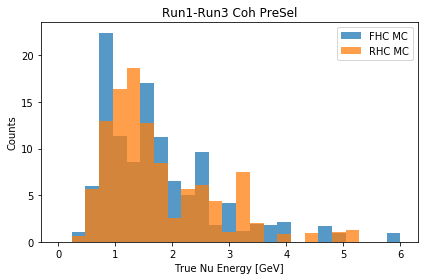

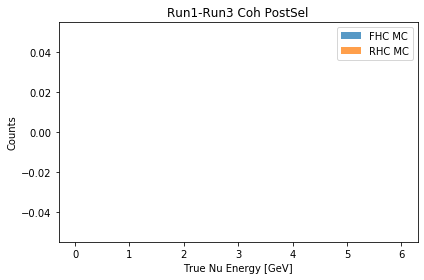

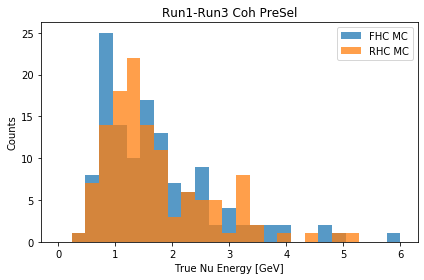

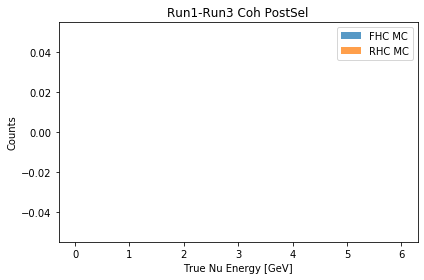

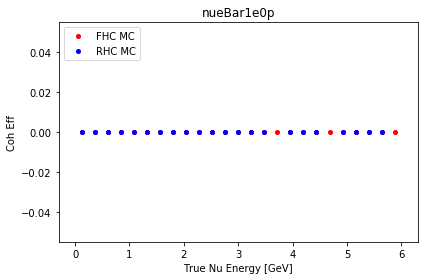

MEC


/Users/elenag/miniconda3/envs/peleeNB/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


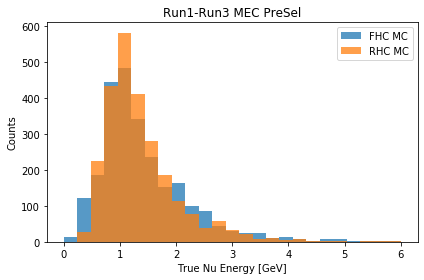

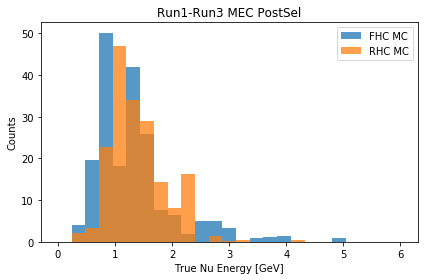

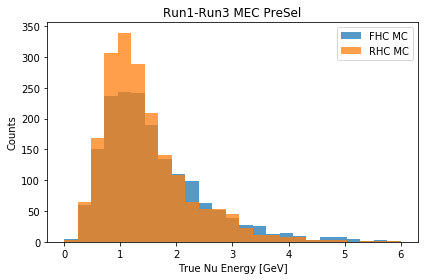

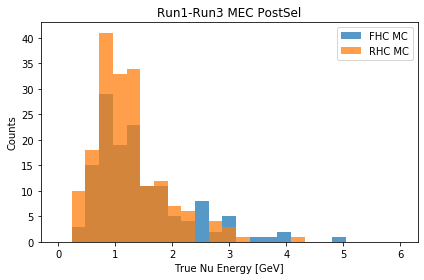

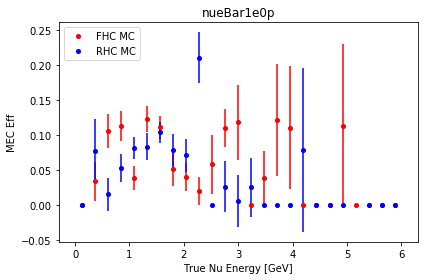

In [25]:
run1CSVNue     = "mc_run1_NuMI.csv"
run3CSVNue     = "mc_run3_NuMI.csv"
run1CSVNueBar  = "mc_run1_NuMIBar.csv"
run3CSVNueBar  = "mc_run3_NuMIBar.csv"

run1CSVNueCheck     = "mc_run1_NuMI_Check.csv"
run3CSVNueCheck     = "mc_run3_NuMI_Check.csv"
run1CSVNueBarCheck  = "mc_run1_NuMIBar_Check.csv"
run3CSVNueBarCheck  = "mc_run3_NuMIBar_Check.csv"

run1CSVNue1eNp = "mc_Sel_run1_1eNp_NuMI.csv"
run3CSVNue1eNp = "mc_Sel_run3_1eNp_NuMI.csv"
run1CSVNue1e0p = "mc_Sel_run1_1e0p_NuMI.csv"
run3CSVNue1e0p = "mc_Sel_run3_1e0p_NuMI.csv"
run1CSVNueBar1eNp = "mc_Sel_run1_1eNp_NuMIBar.csv"
run3CSVNueBar1eNp = "mc_Sel_run3_1eNp_NuMIBar.csv"
run1CSVNueBar1e0p = "mc_Sel_run1_1e0p_NuMIBar.csv"
run3CSVNueBar1e0p = "mc_Sel_run3_1e0p_NuMIBar.csv"


#composition(run1CSVNue   ,run3CSVNue   ,"NuePresel")
#composition(run1CSVNueBar,run3CSVNueBar,"NueBarPresel")


    #allRatio(run1CSVNue   ,run1CSVNueCheck   ,run3CSVNue   ,run3CSVNueCheck   ,nuType = "check")
#allRatio(run1CSVNueBar,run1CSVNueBarCheck,run3CSVNueBar,run3CSVNueBarCheck,nuType = "check")
allRatio(run1CSVNue   ,run1CSVNue1eNp    ,run3CSVNue   ,run3CSVNue1eNp    , "nue","1eNp")
allRatio(run1CSVNueBar,run1CSVNueBar1eNp ,run3CSVNueBar,run3CSVNueBar1eNp , "nueBar","1eNp")
allRatio(run1CSVNue   ,run1CSVNue1e0p    ,run3CSVNue   ,run3CSVNue1e0p    , "nue","1e0p")
allRatio(run1CSVNueBar,run1CSVNueBar1e0p ,run3CSVNueBar,run3CSVNueBar1e0p , "nueBar","1e0p")


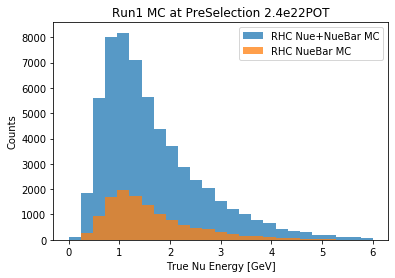

In [55]:
r1     = pd.read_csv(run1CSVNue)
r1b    = pd.read_csv(run1CSVNueBar)
r3     = pd.read_csv(run3CSVNue)
r3b    = pd.read_csv(run3CSVNueBar)

run1 = r1.append(r1b)
run3 = r3.append(r3b)

fig, ax = plt.subplots()
#n1  , bins, patches = ax.hist(run1['nu_e'], 25,range=(0,6),weights=run1['weightSplineTimesTuneTimesPPFX'], alpha=0.75, label="FHC Nue+NueBar MC")
n3  , bins, patches = ax.hist(run3['nu_e'], 25,range=(0,6),weights=run3['weightSplineTimesTuneTimesPPFX'], alpha=0.75, label="RHC Nue+NueBar MC")
#n1_n, bins, patches = ax.hist(r1['nu_e'], 25,range=(0,6),weights=r1['weightSplineTimesTuneTimesPPFX'], alpha=0.75, label="FHC MC")
#n3_n, bins, patches = ax.hist(r3['nu_e'], 25,range=(0,6),weights=r3['weightSplineTimesTuneTimesPPFX'], alpha=0.75, label="RHC MC")
#n1_a, bins, patches = ax.hist(r1b['nu_e'], 25,range=(0,6),weights=r1b['weightSplineTimesTuneTimesPPFX'], alpha=0.75, label="FHC NueBar MC")
n3_a, bins, patches = ax.hist(r3b['nu_e'], 25,range=(0,6),weights=r3b['weightSplineTimesTuneTimesPPFX'], alpha=0.75, label="RHC NueBar MC")

ax.set_xlabel('True Nu Energy [GeV]')
ax.set_ylabel('Counts')
ax.set_title('Run1 MC at PreSelection 2.4e22POT')
ax.legend()

#ratioPlots(n1,n1_a,n3,n3_a,bins,"AntiNue Fraction","AntiNue Predicted Event Component")
#ratioPlots(n1,n1_n,n3,n3_n,bins,"Nue Fraction","Nue Predicted Event Component")


/Users/elenag/miniconda3/envs/peleeNB/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


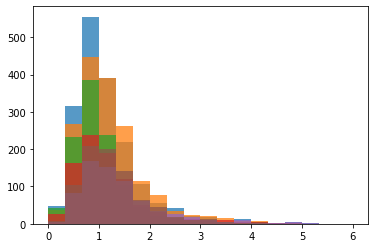

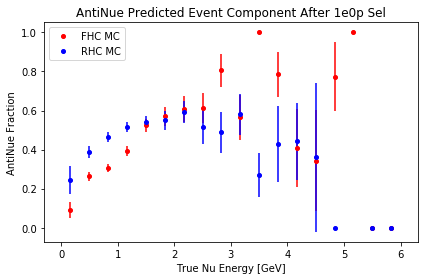

/Users/elenag/miniconda3/envs/peleeNB/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


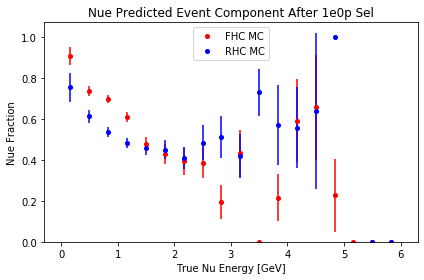

In [48]:
r1     = pd.read_csv(run1CSVNue1e0p)
r1b    = pd.read_csv(run1CSVNueBar1e0p)
r3     = pd.read_csv(run3CSVNue1e0p)
r3b    = pd.read_csv(run3CSVNueBar1e0p)

run1 = r1.append(r1b)
run3 = r3.append(r3b)

fig, ax = plt.subplots()
n1  , bins, patches = ax.hist(run1['nu_e'], 18,range=(0,6),weights=run1['weightSplineTimesTuneTimesPPFX'], alpha=0.75, label="FHC MC")
n3  , bins, patches = ax.hist(run3['nu_e'], 18,range=(0,6),weights=run3['weightSplineTimesTuneTimesPPFX'], alpha=0.75, label="RHC MC")
n1_n, bins, patches = ax.hist(r1['nu_e'], 18,range=(0,6),weights=r1['weightSplineTimesTuneTimesPPFX'], alpha=0.75, label="FHC MC")
n3_n, bins, patches = ax.hist(r3['nu_e'], 18,range=(0,6),weights=r3['weightSplineTimesTuneTimesPPFX'], alpha=0.75, label="RHC MC")
n1_a, bins, patches = ax.hist(r1b['nu_e'], 18,range=(0,6),weights=r1b['weightSplineTimesTuneTimesPPFX'], alpha=0.75, label="FHC MC")
n3_a, bins, patches = ax.hist(r3b['nu_e'], 18,range=(0,6),weights=r3b['weightSplineTimesTuneTimesPPFX'], alpha=0.75, label="RHC MC")

  
ratioPlots(n1,n1_a,n3,n3_a,bins,"AntiNue Fraction","AntiNue Predicted Event Component After 1e0p Sel")
ratioPlots(n1,n1_n,n3,n3_n,bins,"Nue Fraction","Nue Predicted Event Component After 1e0p Sel")
